In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('data/data_final_preprocessed.csv')

In [44]:
df = df[df['bundle_nm'].isin(['Без подписки', 'Pro'])]
df['pro_flg'] = df['bundle_nm'].map({'Без подписки': 0, 'Pro': 1})

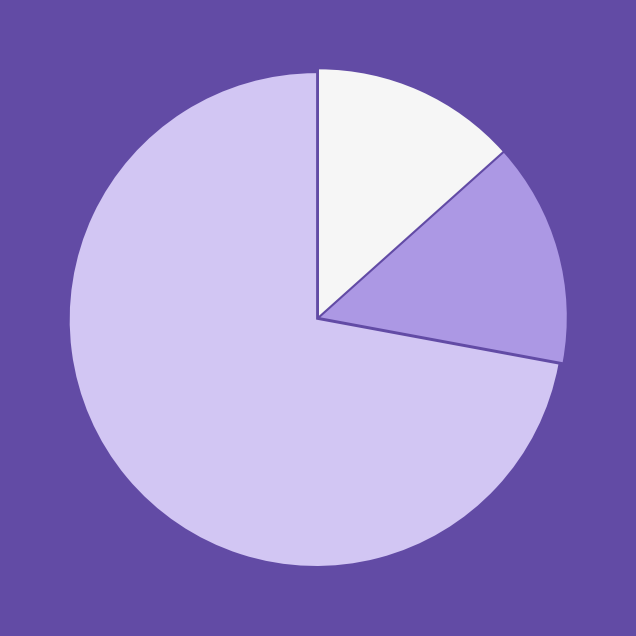

In [45]:
# Customizing our pie chart
colors = ['#D2C6F3', "#AC98E4", "#F6F6F6"]
subs = df["product"].value_counts()
bundle_group_labels = df["product"].unique()

plt.rcParams.update({
    'font.size': 12,  # Общий размер шрифта для текста
    'axes.titlesize': 14,  # Размер шрифта для заголовков осей
    'axes.labelsize': 12,  # Размер шрифта для подписей осей
    'xtick.labelsize': 10,  # Размер шрифта для меток на оси X
    'ytick.labelsize': 10  # Размер шрифта для меток на оси Y
})

plt.figure(figsize=(8, 8))

# Создаем массив explode для создания пространства между сегментами
explode = [0.01] * len(subs)  # Вытягиваем все сегменты

# Убираем все подписи и проценты, добавляем explode
plt.pie(subs, labels=None, startangle=90, colors=colors, radius=1, explode=explode)
plt.gcf().set_facecolor('#624BA5')
plt.savefig('pie_chart.png', format='png')
plt.show()


In [46]:
subs / df.shape[0]

product
Credits                   0.720851
Debit and Investment      0.145382
Insurance and Services    0.133767
Name: count, dtype: float64

In [47]:
grouped = df.groupby('product').agg(
    count=('gender_cd', 'size'),
    average_age=('age', 'mean'),
    female_count=('gender_cd', lambda x: (x == 0).sum()),
    male_count=('gender_cd', lambda x: (x == 1).sum())
).reset_index()

# Рассчитываем проценты
grouped['female_percentage'] = (grouped['female_count'] / grouped['count']) * 100
grouped['male_percentage'] = (grouped['male_count'] / grouped['count']) * 100

# Переименовываем столбцы для удобства
grouped.rename(columns={
    'count': 'total_count',
    'average_age': 'average_age',
    'female_count': 'female_count',
    'male_count': 'male_count'
}, inplace=True)

# Выводим результат
print(grouped)

                  product  total_count  average_age  female_count  male_count  \
0                 Credits        11419    38.355460          5605        5814   
1    Debit and Investment         2303    37.646201          1076        1227   
2  Insurance and Services         2119    37.968853           848        1271   

   female_percentage  male_percentage  
0          49.084859        50.915141  
1          46.721667        53.278333  
2          40.018877        59.981123  


In [48]:
result = df.groupby('product').agg(
    total_count=('pro_flg', 'size'),
    pro_count=('pro_flg', 'sum')
).reset_index()

# Рассчитываем процент
result['pro_percentage'] = (result['pro_count'] / result['total_count']) * 100

# Переименовываем столбцы для удобства
result.rename(columns={
    'total_count': 'total_count',
    'pro_count': 'subscribers_count'
}, inplace=True)

# Выводим результат
print(result[['product', 'subscribers_count', 'total_count', 'pro_percentage']])

                  product  subscribers_count  total_count  pro_percentage
0                 Credits               2555        11419       22.374989
1    Debit and Investment                419         2303       18.193660
2  Insurance and Services                747         2119       35.252478
